# Mobile Phone Price Prediction using XGBoost Regressor

This notebook demonstrates a comprehensive approach to predicting mobile phone prices using the XGBoost Regressor model. It includes data loading, cleaning, preprocessing, feature engineering, hyperparameter tuning, model evaluation, and feature importance visualization. By implementing an optimized XGBoost Regressor, we aim to achieve high predictive accuracy and understand the key features affecting mobile phone prices.

## Importing Necessary Libraries
* pandas, numpy: Essential libraries for data manipulation and numerical operations.
* matplotlib.pyplot, seaborn: For data visualization to better understand model outcomes.
* train_test_split, RandomizedSearchCV from sklearn: For splitting the data into training and testing sets and hyperparameter tuning.
* mean_squared_error, r2_score: To evaluate model performance.
* XGBRegressor from xgboost: The primary model used for predicting mobile phone prices.


In [1]:
# Importing necessary libraries
# Libraries are used for data manipulation, visualization, modeling, and model evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from xgboost import XGBRegressor

## Loading the Dataset and Data Overview
The dataset is loaded using pd.read_csv, and the initial structure and content are inspected. Summary statistics and data types are displayed to understand the data better.

In [2]:
# Loading the dataset
# Reading the CSV file that contains the processed phone data
file_path = '/kaggle/input/phone-information-2024/processed_data news.csv'
data = pd.read_csv(file_path)

# Data overview
# Displaying the first five rows to inspect data structure and content
print("First five rows of the dataset:")
display(data.head())

# Showing summary statistics of numeric columns
print("\nDataset Summary:")
display(data.describe())

# Displaying data types for each column to ensure they are correctly formatted
print("\nData Types:")
display(data.dtypes)

First five rows of the dataset:


,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,...,Chipset,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range
0,apple,Apple iPhone X,Amazon DE,213.85,EUR,231.73,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),...,Apple A11 Bionic (10 nm),Hexa-core 2.39 GHz (2x Monsoon + 4x Mistral),Apple GPU (three-core graphics),2017,0,458,16.978.300.000.000.000,197.315,22.484.699.999.999.900,high price
1,apple,Apple iPhone X,Amazon US,162.90,USD,162.90,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),...,Apple A11 Bionic (10 nm),Hexa-core 2.39 GHz (2x Monsoon + 4x Mistral),Apple GPU (three-core graphics),2017,0,458,16.978.300.000.000.000,197.315,22.484.699.999.999.900,low price
2,samsung,Samsung Galaxy S9+,Amazon DE,117.84,EUR,127.69,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,Exynos 9810 (10 nm) - EMEA,Octa-core (4x2.7 GHz Mongoose M3 & 4x1.8 GHz C...,Mali-G72 MP18 - EMEA,2018,0,529,14.129.600.000.000.000,214.560,311.688,low price
3,samsung,Samsung Galaxy S9+,Amazon DE,279.00,EUR,302.32,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,Exynos 9810 (10 nm) - EMEA,Octa-core (4x2.7 GHz Mongoose M3 & 4x1.8 GHz C...,Mali-G72 MP18 - EMEA,2018,0,529,14.129.600.000.000.000,214.560,311.688,medium price
4,samsung,Samsung Galaxy S9+,Amazon DE,309.04,EUR,334.88,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,Exynos 9810 (10 nm) - EMEA,Octa-core (4x2.7 GHz Mongoose M3 & 4x1.8 GHz C...,Mali-G72 MP18 - EMEA,2018,0,529,14.129.600.000.000.000,214.560,311.688,high price



Dataset Summary:


,price,price_USD,storage,ram,Weight,Display_Size,NFC,BATTERY,Year,Foldable,PPI_Density,quantile_50
count,1715.000000,1715.000000,1715.000000,1715.000000,1712.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000
mean,381.338560,420.052589,271.286297,7.973178,195.212266,6.565038,0.917201,4657.909038,2022.050146,0.048397,403.793586,314.535720
std,334.142684,361.986094,207.263335,3.422996,24.714075,0.382489,0.275658,693.623964,1.427699,0.214665,71.649872,114.271852
min,49.000000,52.630000,32.000000,2.000000,135.000000,4.700000,0.000000,1821.000000,2017.000000,0.000000,179.000000,197.315000
25%,149.740000,167.890000,128.000000,6.000000,183.500000,6.500000,1.000000,4500.000000,2021.000000,0.000000,393.000000,247.180000
50%,249.990000,279.000000,256.000000,8.000000,193.250000,6.600000,1.000000,5000.000000,2022.000000,0.000000,402.000000,249.990000
75%,499.475000,551.145000,256.000000,12.000000,204.000000,6.700000,1.000000,5000.000000,2023.000000,0.000000,446.000000,330.675000
max,2179.460000,2361.660000,1000.000000,24.000000,627.000000,12.400000,1.000000,10200.000000,2024.000000,1.000000,643.000000,552.385000



Data Types:


phone_brand            object
phone_model            object
store                  object
price                 float64
currency               object
price_USD             float64
storage                 int64
ram                     int64
Launch                 object
Dimensions             object
Weight                float64
Display_Type           object
Display_Size          float64
Display_Resolution     object
OS                     object
NFC                     int64
USB                    object
BATTERY                 int64
Features_Sensors       object
Colors                 object
Video                  object
Chipset                object
CPU                    object
GPU                    object
Year                    int64
Foldable                int64
PPI_Density             int64
quantile_10            object
quantile_50           float64
quantile_90            object
price_range            object
dtype: object

## Checking for Missing Values
Missing values in each column are counted to identify columns requiring further preprocessing.

In [3]:
# Checking for missing values in the dataset
print("\nMissing Values:")
missing_values = data.isnull().sum()
display(missing_values[missing_values > 0])


Missing Values:


Weight    3
dtype: int64

## Data Cleaning and Preprocessing
Numeric columns like price_USD, price, storage, and ram are converted to numeric data types, filling missing values with median values. The Launch column is converted to datetime format, and categorical columns are set to appropriate types.

In [4]:
# Data Cleaning and Preprocessing
# Converting 'price_USD' and 'price' columns to numeric, handling errors by converting invalid values to NaN
data['price_USD'] = pd.to_numeric(data['price_USD'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Dropping rows with missing values in the target column ('price_USD')
data.dropna(subset=['price_USD'], inplace=True)

# Filling missing values in 'storage' and 'ram' with the median value of each column
data['storage'] = pd.to_numeric(data['storage'], errors='coerce').fillna(data['storage'].median())
data['ram'] = pd.to_numeric(data['ram'], errors='coerce').fillna(data['ram'].median())

# Converting 'Launch' column to datetime format for date-based analysis
data['Launch'] = pd.to_datetime(data['Launch'], errors='coerce')

# Converting 'Foldable' column to a categorical type as it only has two categories (0 and 1)
data['Foldable'] = data['Foldable'].astype('category')

# Handling missing values in the 'Weight' column by filling with the median
data['Weight'] = pd.to_numeric(data['Weight'], errors='coerce').fillna(data['Weight'].median())

# Checking if there are any missing values left
print("\nMissing Values after Handling:")
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    display(missing_values[missing_values > 0])
else:
    print("No missing values remaining in the dataset.")


Missing Values after Handling:
No missing values remaining in the dataset.


## Exploratory Data Analysis (EDA)
Several visualizations are created to explore the data distribution and relationships. This includes histograms for price distribution, boxplots for price range comparison, average price by brand, and a correlation heatmap for numerical features.

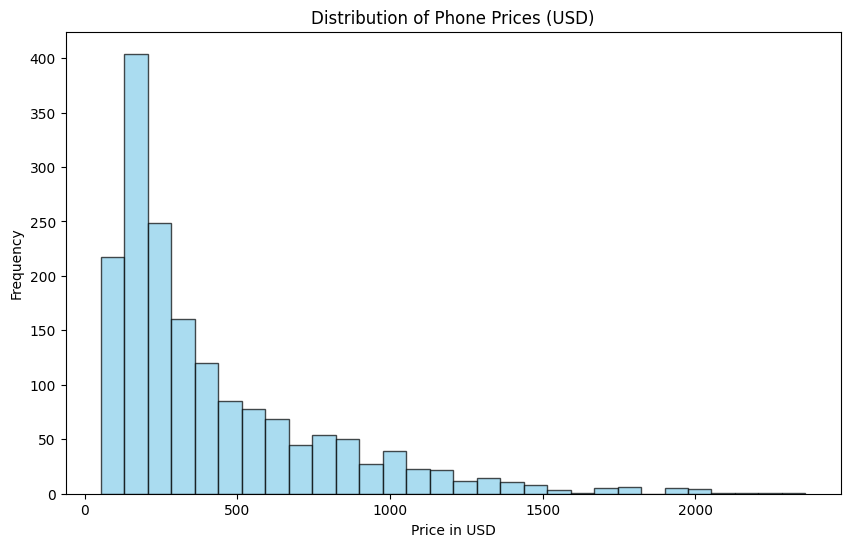

In [5]:
# Exploratory Data Analysis (EDA)
# Plotting the distribution of phone prices in USD
plt.figure(figsize=(10, 6))
plt.hist(data['price_USD'], bins=30, color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Distribution of Phone Prices (USD)')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

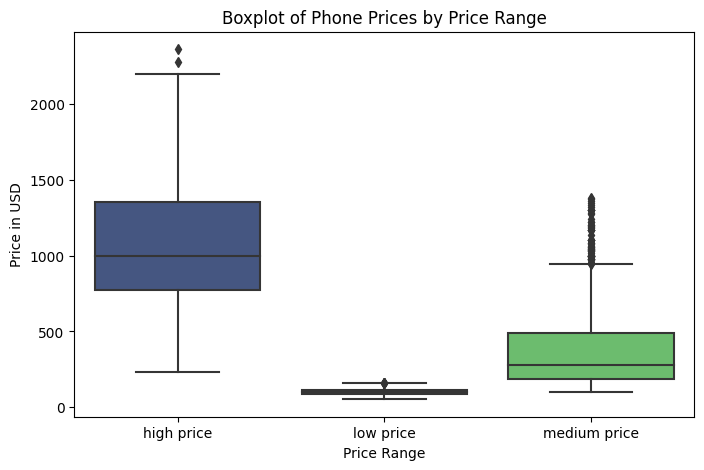

In [6]:
# Plotting price distribution by price range category using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_range', y='price_USD', data=data, palette='viridis')
plt.title('Boxplot of Phone Prices by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Price in USD')
plt.show()

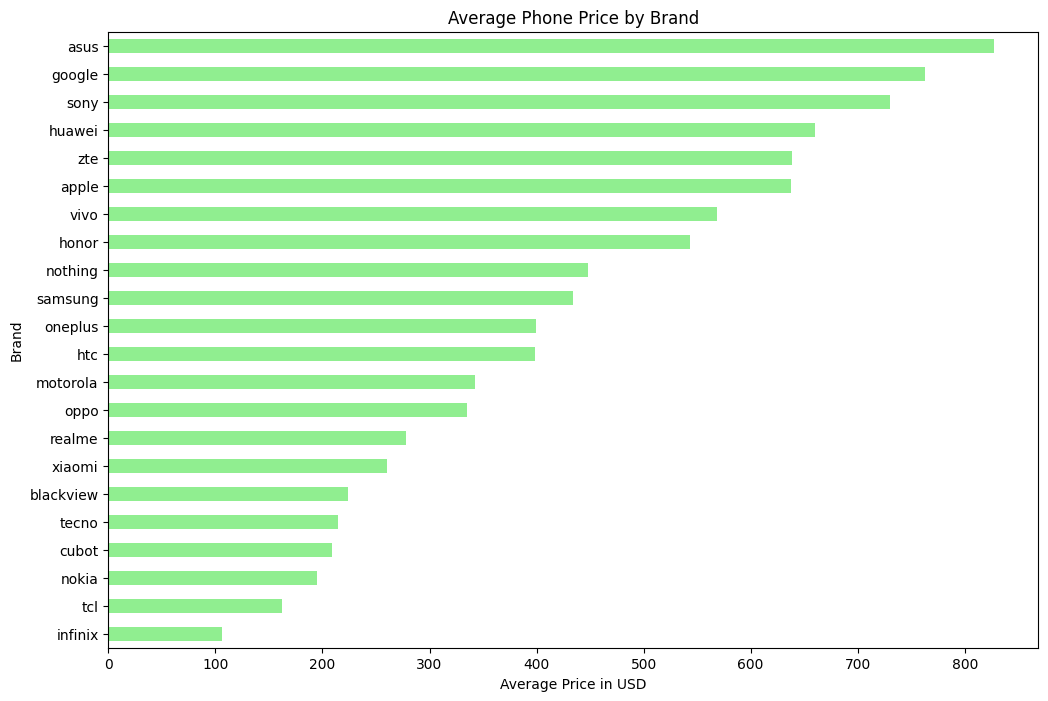

In [7]:
# Average price by brand
# Calculating the average price for each brand and visualizing it as a bar chart
average_price_by_brand = data.groupby('phone_brand')['price_USD'].mean().sort_values()
plt.figure(figsize=(12, 8))
average_price_by_brand.plot(kind='barh', color='lightgreen')
plt.title('Average Phone Price by Brand')
plt.xlabel('Average Price in USD')
plt.ylabel('Brand')
plt.show()

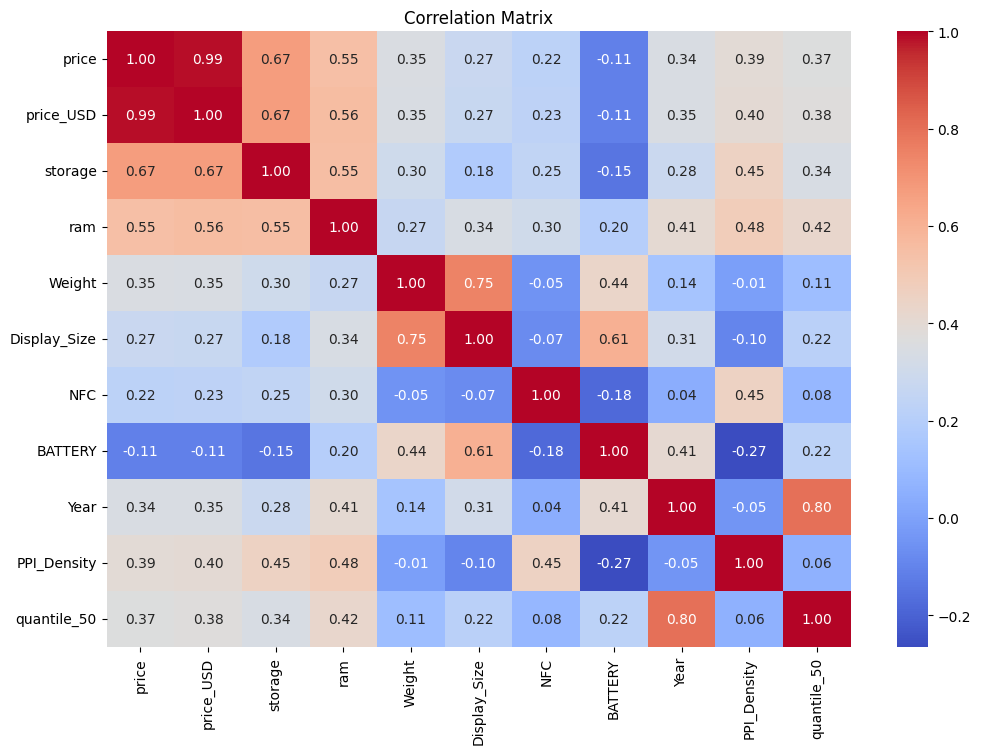

In [8]:
# Correlation matrix for numerical features
# Selecting only numerical columns to avoid errors and displaying the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Feature Engineering
Additional features are generated by extracting the year from Launch, and categorical columns (Display_Type and Chipset) are converted to dummy variables for better model input.

In [9]:
# Feature Engineering
# Creating an additional feature by extracting the year from the 'Launch' column
data['Launch_Year'] = data['Launch'].dt.year

# Adding additional features by converting categorical columns to dummy variables
# For instance, 'Display_Type' and 'Chipset' are converted to dummies for better model input
data = pd.get_dummies(data, columns=['Display_Type', 'Chipset'], drop_first=True)

## Selecting Features and Target Variable
* Features (X): The features used in the model include storage, ram, PPI_Density, Launch_Year, Weight, and the dummy variables derived from Display_Type and Chipset.
* Target (y): The target variable is price_USD, representing the mobile phone price in USD.

In [10]:
# Selecting Features and Target Variable
# Using additional features including dummies from 'Display_Type' and 'Chipset'
X = data[['storage', 'ram', 'PPI_Density', 'Launch_Year', 'Weight'] + 
         [col for col in data.columns if 'Display_Type' in col or 'Chipset' in col]]
y = data['price_USD']  # Target variable is 'price_USD'

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [11]:
# Defining parameter grid for tuning XGBRegressor
param_grid_xgb = {
    'n_estimators': [300, 500, 700],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

# Initializing RandomizedSearchCV with XGBRegressor
random_search_xgb = RandomizedSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_grid_xgb,
    n_iter=50,  # Number of parameter settings sampled
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

random_search_xgb.fit(X_train, y_train)

best_model_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


## Evaluating Model Performance
After tuning, the model is evaluated using RMSE and R² metrics to determine its accuracy in predicting phone prices.

In [12]:
# Checking if RandomizedSearchCV has been fitted
if hasattr(random_search_xgb, 'best_params_'):
    print("XGBRegressor Model Evaluation with Tuned Parameters:")
    print(f"Best Parameters: {random_search_xgb.best_params_}")
else:
    print("RandomizedSearchCV did not store 'best_params_'. Please ensure it completed successfully.")

# Evaluating the XGBRegressor model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R^2 Score: {r2_xgb}")

XGBRegressor Model Evaluation with Tuned Parameters:
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6}
Root Mean Squared Error (RMSE): 175.48997096131617
R^2 Score: 0.7703382241883434


## Feature Importance Analysis
The top 20 important features are visualized to identify which specifications influence phone prices the most.

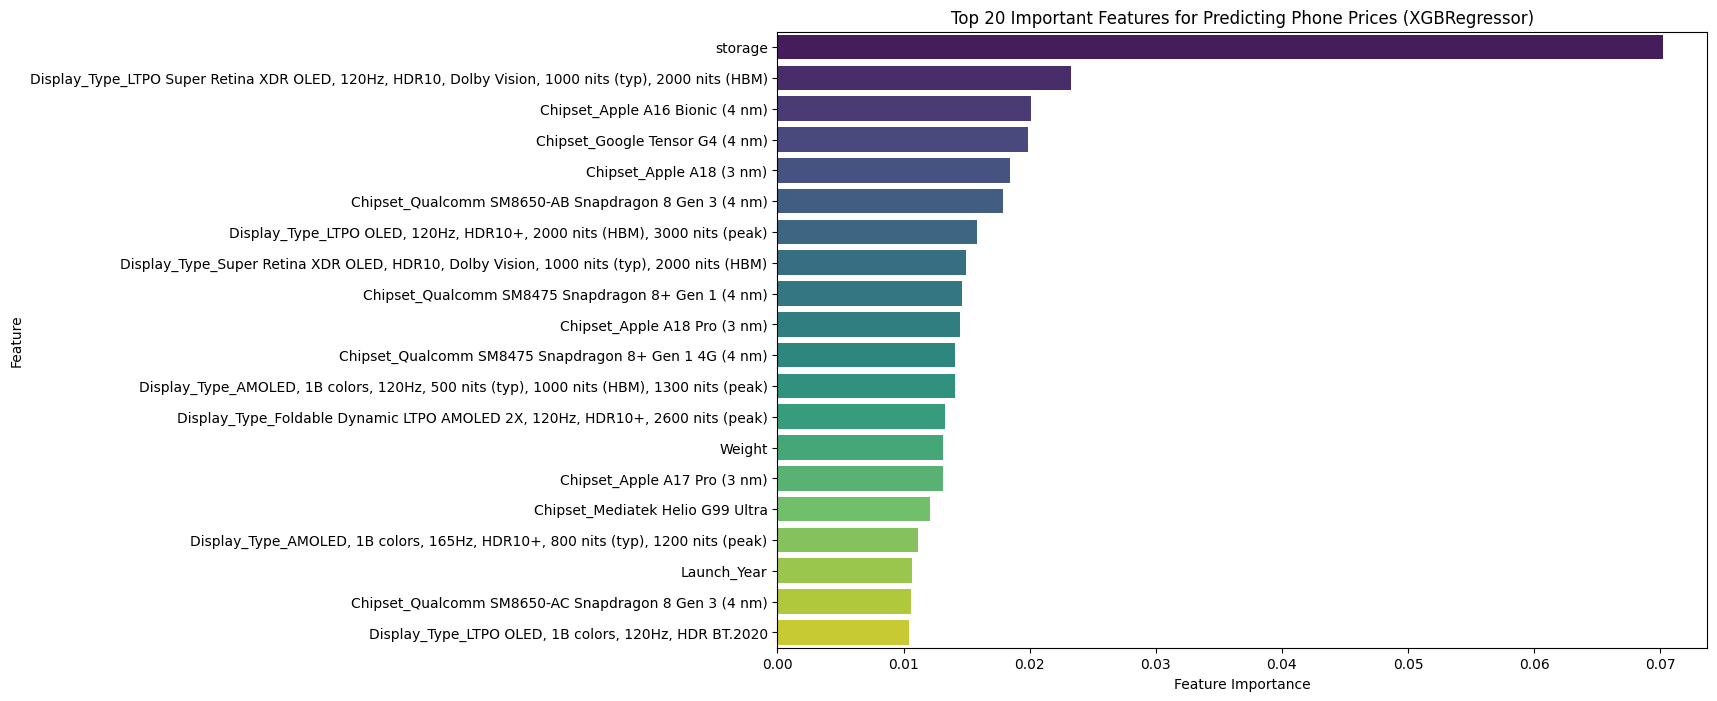

In [13]:
# Plotting Feature Importance from XGBRegressor
feature_importances_xgb = best_model_xgb.feature_importances_
importance_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_xgb})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb, palette='viridis')
plt.title('Top 20 Important Features for Predicting Phone Prices (XGBRegressor)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

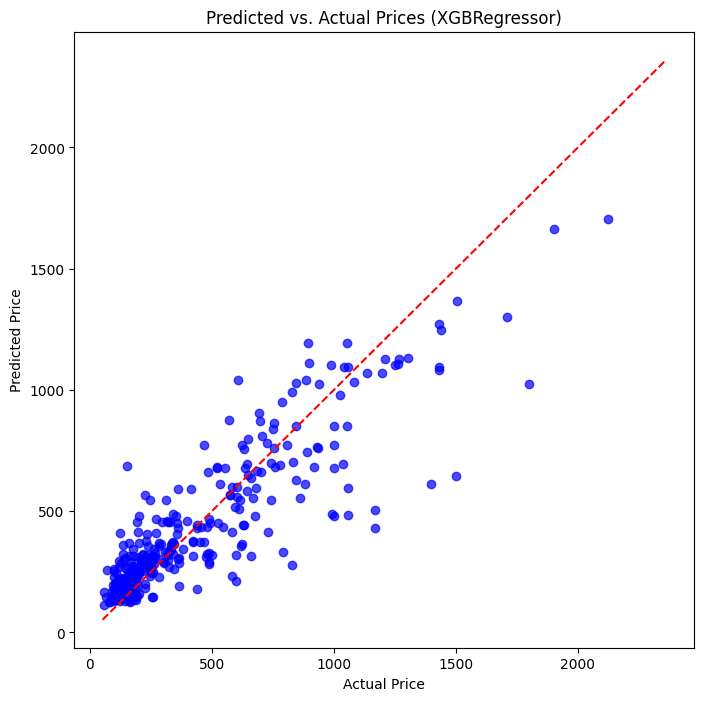

In [14]:
# Additional Analysis - Predicted vs. Actual Prices Plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs. Actual Prices (XGBRegressor)')
plt.show()

## Conclusion and Future Work
The XGBoost Regressor model provides promising results for predicting mobile phone prices, as seen from the evaluation metrics. The hyperparameter tuning with RandomizedSearchCV improves the model’s performance, highlighting the effectiveness of selecting the optimal parameters. Additionally, the feature importance analysis gives insight into the most significant features influencing the model’s predictions, such as storage, ram, and Launch_Year.

For future research and improvements, several enhancements could be made to this model. First, incorporating additional features such as battery capacity, camera quality, or even brand information might provide more context for predicting mobile phone prices and increase model accuracy. Further optimization could be achieved by employing more advanced hyperparameter tuning methods, such as GridSearchCV for exhaustive parameter exploration or Bayesian Optimization, to refine the model's performance. Exploring alternative regression models, like CatBoost or LightGBM, may also yield better results and offer new insights when compared with the XGBoost Regressor. Lastly, enhancing model interpretability through SHAP (SHapley Additive exPlanations) values would allow for a more nuanced understanding of feature contributions to each prediction, improving transparency and the ability to validate the model's decision-making process.